# Présentation du projet

# Initialisation du projet et de la base de données

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS, add_constant

In [91]:
films_set = pd.read_excel("V1dataframe_films.xlsx")
films_set

,Name,Budget,Income,Spectators,Production,Allocine_rate,Month_release,Season,Year_release,Genre,Actor_oscar_nb
0,101 Dalmatiens (1961),4 000 000,303 000 000,75 000 000,USA,4.3,Janvier,Winter,1961,Animation,0
1,12 Years a Slave,20 000 000,187 700 000,35 000 000,USA,4.5,Novembre,Autumn,2013,Drame,3
2,127 Heures,18 000 000,60 000 000,12 000 000,USA,4.2,Janvier,Winter,2010,Aventure,0
3,2001: A Space Odyssey,10 500 000,146 000 000,20 000 000,UK,4.6,Avril,Spring,1968,Science-fiction,0
4,À bout de souffle,500 000,1 300 000,300 000,France,4.4,Mars,Spring,1960,Drame,0
...,...,...,...,...,...,...,...,...,...,...,...
279,Wild Tales (Relatos salvajes),3 000 000,44 000 000,8 000 000,Argentine,4.5,Mai,Spring,2014,Comédie dramatique,0
280,Wind River,11 000 000,45 000 000,8 000 000,USA,4.1,Août,Summer,2017,Thriller,0
281,Wonder Woman,149 000 000,821 800 000,65 000 000,USA,4.1,Juin,Summer,2017,Action,0
282,Your Name.,15 000 000,380 000 000,20 000 000,Japon,4.5,Novembre,Autumn,2016,Animation,0


In [92]:
films_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            284 non-null    object 
 1   Budget          284 non-null    object 
 2   Income          284 non-null    object 
 3   Spectators      284 non-null    object 
 4   Production      284 non-null    object 
 5   Allocine_rate   284 non-null    float64
 6   Month_release   284 non-null    object 
 7   Season          284 non-null    object 
 8   Year_release    284 non-null    int64  
 9   Genre           284 non-null    object 
 10  Actor_oscar_nb  284 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 24.5+ KB


In [93]:
def transform_to_numeric(filmsdata, columns):
    filmsdata[columns] = filmsdata[columns].replace({' ': '', ',': '.'}, regex=True).apply(pd.to_numeric, errors='coerce')
    return filmsdata

numeric_columns = ['Budget', 'Spectators', 'Income', 'Actor_oscar_nb', 'Allocine_rate']
films_set = transform_to_numeric(films_set, numeric_columns)

In [94]:
films_set['Budget'] = films_set['Budget'] / 1_000_000
films_set['Income'] = films_set['Income'] / 1_000_000
films_set['Spectators'] = films_set['Spectators'] / 1_000_000
films_set = films_set.copy()

In [95]:
films_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            284 non-null    object 
 1   Budget          284 non-null    float64
 2   Income          284 non-null    float64
 3   Spectators      284 non-null    float64
 4   Production      284 non-null    object 
 5   Allocine_rate   284 non-null    float64
 6   Month_release   284 non-null    object 
 7   Season          284 non-null    object 
 8   Year_release    284 non-null    int64  
 9   Genre           284 non-null    object 
 10  Actor_oscar_nb  284 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 24.5+ KB


In [96]:
films_set

,Name,Budget,Income,Spectators,Production,Allocine_rate,Month_release,Season,Year_release,Genre,Actor_oscar_nb
0,101 Dalmatiens (1961),4.0,303.0,75.0,USA,4.3,Janvier,Winter,1961,Animation,0
1,12 Years a Slave,20.0,187.7,35.0,USA,4.5,Novembre,Autumn,2013,Drame,3
2,127 Heures,18.0,60.0,12.0,USA,4.2,Janvier,Winter,2010,Aventure,0
3,2001: A Space Odyssey,10.5,146.0,20.0,UK,4.6,Avril,Spring,1968,Science-fiction,0
4,À bout de souffle,0.5,1.3,0.3,France,4.4,Mars,Spring,1960,Drame,0
...,...,...,...,...,...,...,...,...,...,...,...
279,Wild Tales (Relatos salvajes),3.0,44.0,8.0,Argentine,4.5,Mai,Spring,2014,Comédie dramatique,0
280,Wind River,11.0,45.0,8.0,USA,4.1,Août,Summer,2017,Thriller,0
281,Wonder Woman,149.0,821.8,65.0,USA,4.1,Juin,Summer,2017,Action,0
282,Your Name.,15.0,380.0,20.0,Japon,4.5,Novembre,Autumn,2016,Animation,0


# Statistique descriptive

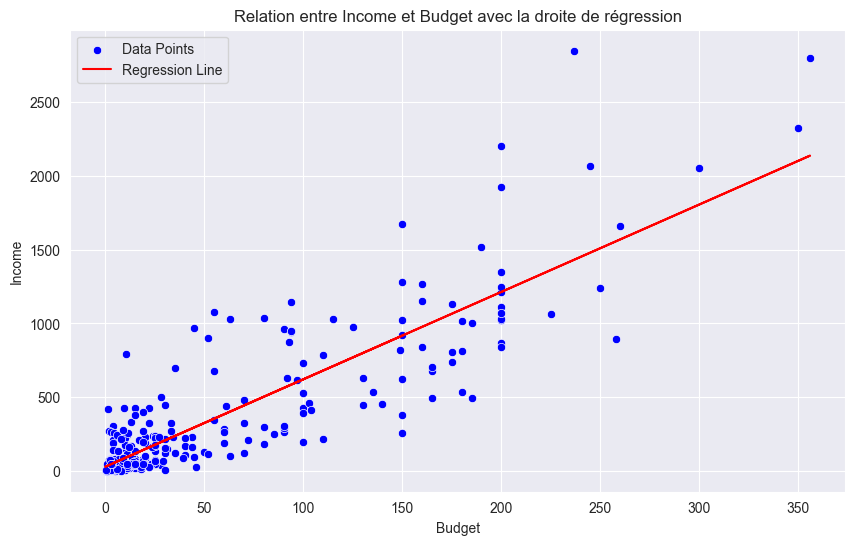

In [98]:
X = films_set[['Budget']].values.reshape(-1, 1)
y = films_set['Income'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot data points and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=films_set['Budget'], y=films_set['Income'], label='Data Points', color='blue')
plt.plot(films_set['Budget'], y_pred, color='red', label='Regression Line')
plt.title('Relation entre Income et Budget avec la droite de régression')
plt.xlabel('Budget')
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.show()

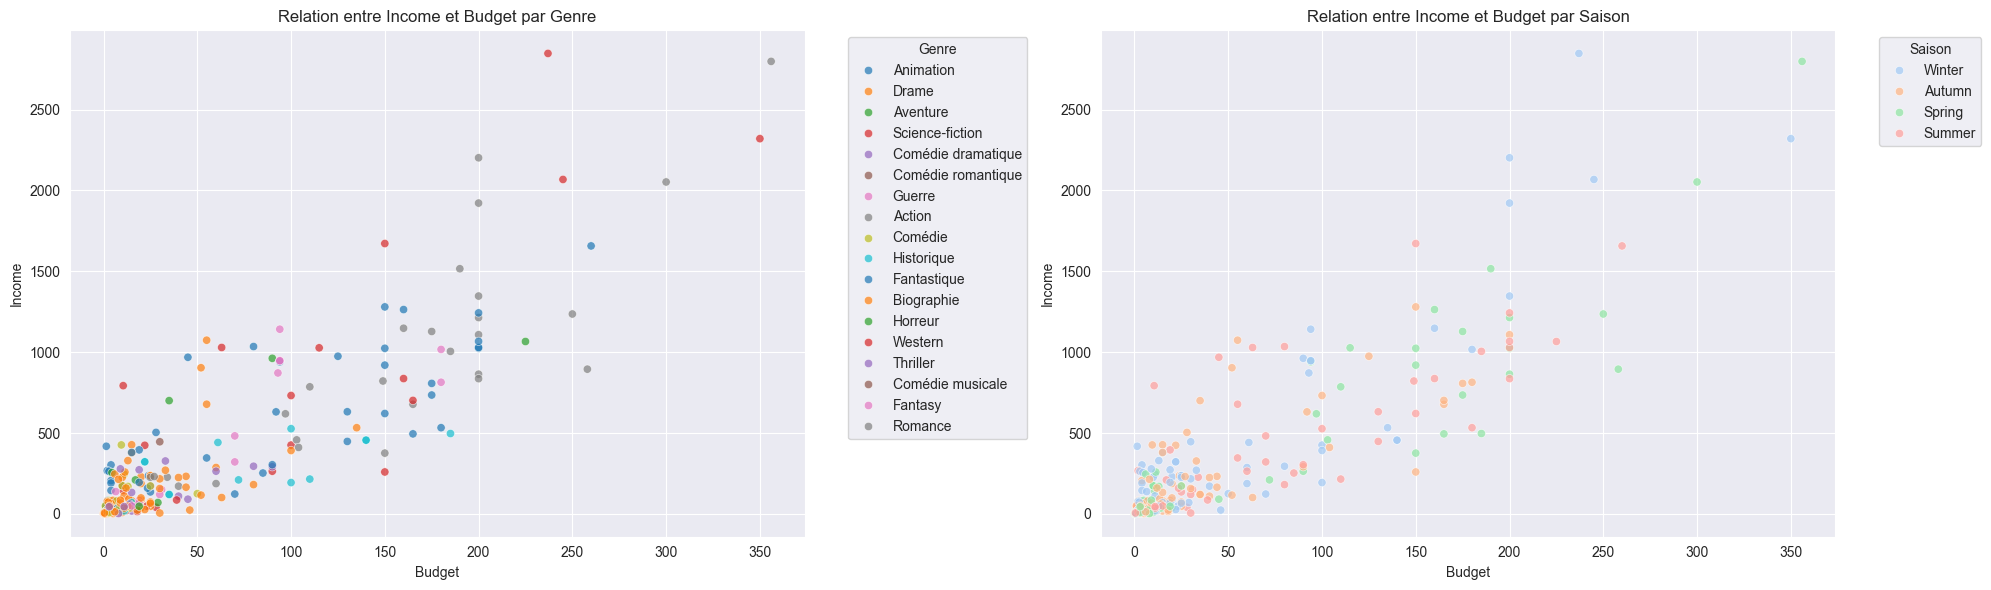

In [99]:
plt.figure(figsize=(20, 6))

# Graphique 1: Relation Budget-Income avec couleur pour le Genre
plt.subplot(1, 2, 1)
sns.scatterplot(data=films_set, x='Budget', y='Income', hue='Genre', palette='tab10', alpha=0.7)
plt.title('Relation entre Income et Budget par Genre')
plt.xlabel('Budget')
plt.ylabel('Income')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Graphique 2: Relation Budget-Income avec couleur pour la Saison
plt.subplot(1, 2, 2)
sns.scatterplot(data=films_set, x='Budget', y='Income', hue='Season', palette='pastel', alpha=0.7)
plt.title('Relation entre Income et Budget par Saison')
plt.xlabel('Budget')
plt.ylabel('Income')
plt.legend(title='Saison', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

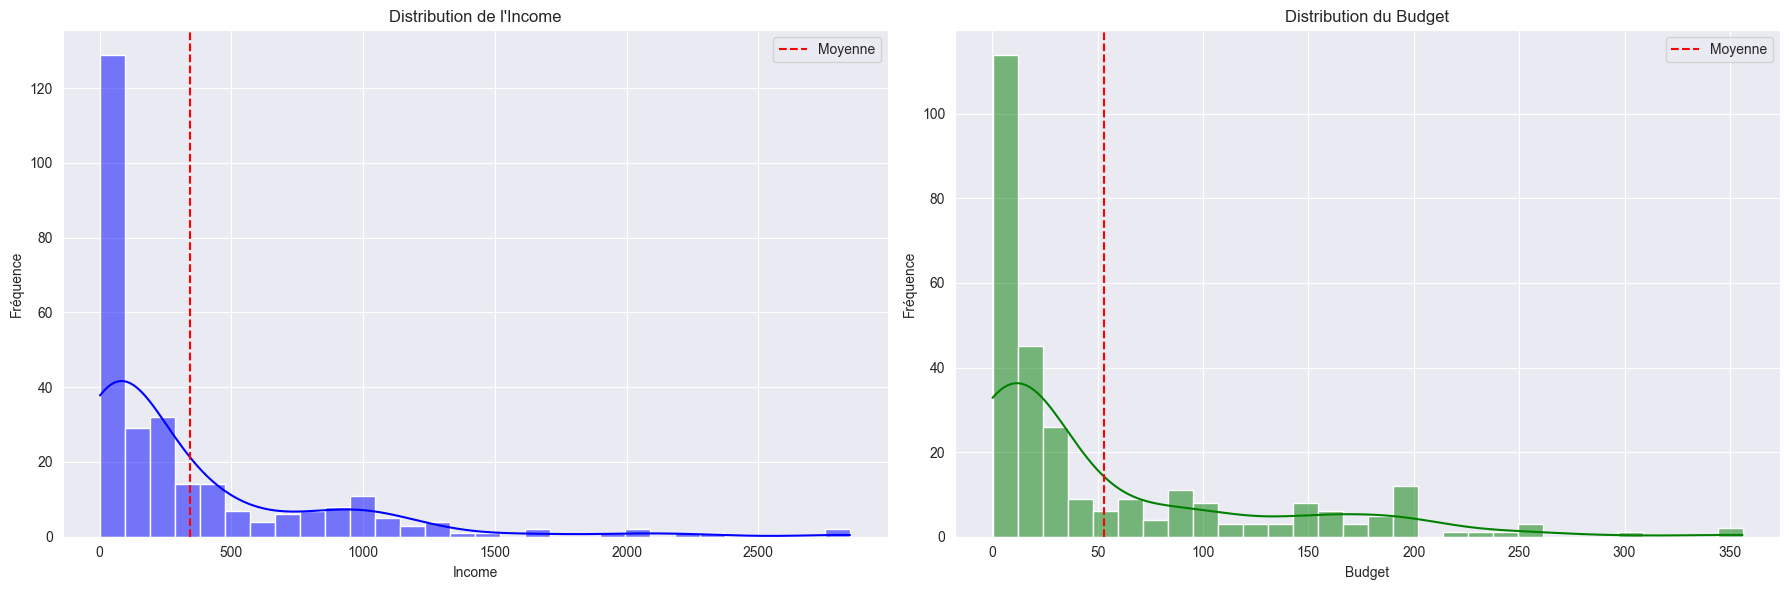

In [101]:
plt.figure(figsize=(18, 6))

# Graphique 1: Distribution de l'Income
plt.subplot(1, 2, 1)
sns.histplot(films_set['Income'], kde=True, color='blue', bins=30)
plt.axvline(films_set['Income'].mean(), color='red', linestyle='--', label='Moyenne')
plt.title("Distribution de l'Income")
plt.xlabel("Income")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)

# Graphique 2: Distribution du Budget
plt.subplot(1, 2, 2)
sns.histplot(films_set['Budget'], kde=True, color='green', bins=30)
plt.axvline(films_set['Budget'].mean(), color='red', linestyle='--', label='Moyenne')
plt.title("Distribution du Budget")
plt.xlabel("Budget")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

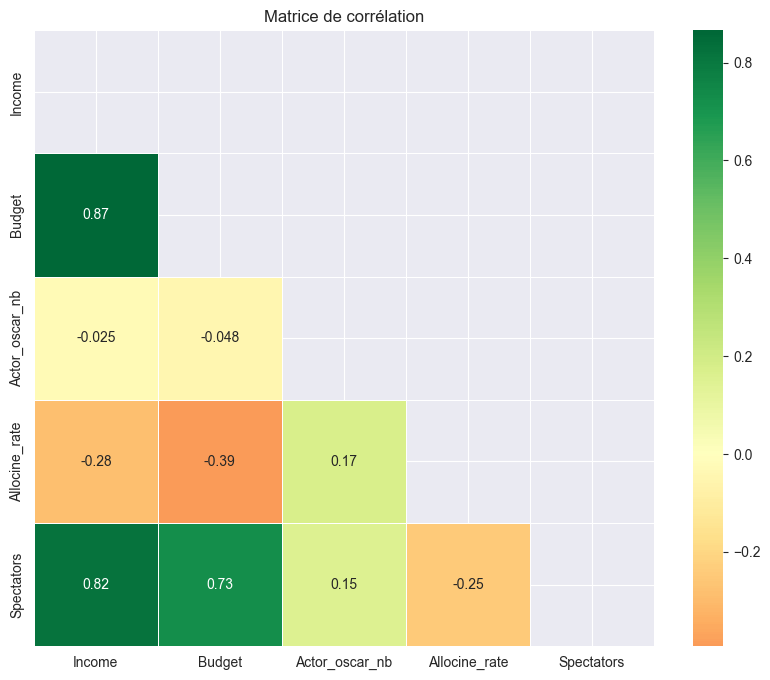

In [103]:
correlation_matrix = films_set[['Income', 'Budget', 'Actor_oscar_nb', 'Allocine_rate', 'Spectators']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0, linewidths=0.5, mask=np.triu(correlation_matrix))
plt.title('Matrice de corrélation')
plt.show()

# Modèle de régression

In [107]:
def encode_features(df, categorical_columns):
    """
    Encore les variables catégorielles en varibles numériques avec OneHotEncoder, tout en garantissant aucune multicolinéarité.
    """
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_features = encoder.fit_transform(df[categorical_columns])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
    return encoded_df, encoder

def prepare_data_for_regression(df, numerical_columns, encoded_df):
    """
    Combine les variables encodées et numériques (variables indépendantes X et variable dépendantes Y) pour préparer la regression.
    """
    combined_df = pd.concat([df[numerical_columns], encoded_df], axis=1)
    X = combined_df.drop('Income', axis=1)
    X = add_constant(X)  # Add constant for the intercept
    y = combined_df['Income']
    return X, y

def split_and_fit_model(X, y):
    """
    Divise les données en ensembles d'entraînement et de test, et ajuster un modèle de régression linéaire OLS

    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = OLS(y_train, X_train).fit()
    residuals = y_train - model.predict(X_train)
    return model, residuals

def summarize_model(model):
    """
    Summarizes the OLS regression model results.
    """
    return model.summary()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     41.81
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           2.00e-63
Time:                        12:16:55   Log-Likelihood:                -1543.1
No. Observations:                 227   AIC:                             3132.
Df Residuals:                     204   BIC:                             3211.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -614.4699    242.611     -2.533      0.012   -1092.816    -136.124
Budget                       5.9954      0.284     21.099      0.000       5.435       6.556
Allocine_rate              149.3775     56.574      2.640      0.009      37.833     260.922
Season_Spring               -1.6517     44.899     -0.037      0.971     -90.177      86.874
Season_Summer              -13.3782     50.445     -0.265      0.791    -112.839      86.083
Season_Winter              119.1723     42.684      2.792      0.006      35.015     203.330
Genre_Animation            -11.3084     66.574     -0.170      0.865    -142.570     119.954
Genre_Aventure            -160.6383    146.413     -1.097      0.274    -449.314     128.038
Genre_Biographie          -150.9565    106.855     -1.413      0.159    -361.639      59.726
Genre_Comédie              -19.5497     82.350     -0.237      0.813    -181.916     142.817
Genre_Comédie dramatique   -74.4996    175.497     -0.425      0.672    -420.519     271.520
Genre_Comédie musicale     149.0866    237.631      0.627      0.531    -319.441     617.615
Genre_Comédie romantique    87.8441    238.730      0.368      0.713    -382.850     558.538
Genre_Drame                -53.2162     70.260     -0.757      0.450    -191.745      85.312
Genre_Fantastique          181.3481    141.543      1.281      0.202     -97.726     460.423
Genre_Fantasy              101.7239    112.631      0.903      0.368    -120.347     323.795
Genre_Guerre               -67.5416    104.460     -0.647      0.519    -273.501     138.417
Genre_Historique          -277.5615     96.902     -2.864      0.005    -468.619     -86.504
Genre_Horreur              -29.5318    175.659     -0.168      0.867    -375.871     316.807
Genre_Romance              426.1711    172.363      2.473      0.014      86.331     766.012
Genre_Science-fiction      138.1579     79.839      1.730      0.085     -19.257     295.573
Genre_Thriller             -68.2462     83.569     -0.817      0.415    -233.016      96.524
Genre_Western              249.5093    239.021      1.044      0.298    -221.759     720.777
==============================================================================
Omnibus:                       52.764   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.225
Skew:                           0.864   Prob(JB):                     2.24e-46
Kurtosis:                       7.386   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong mult

### Plot résiduals

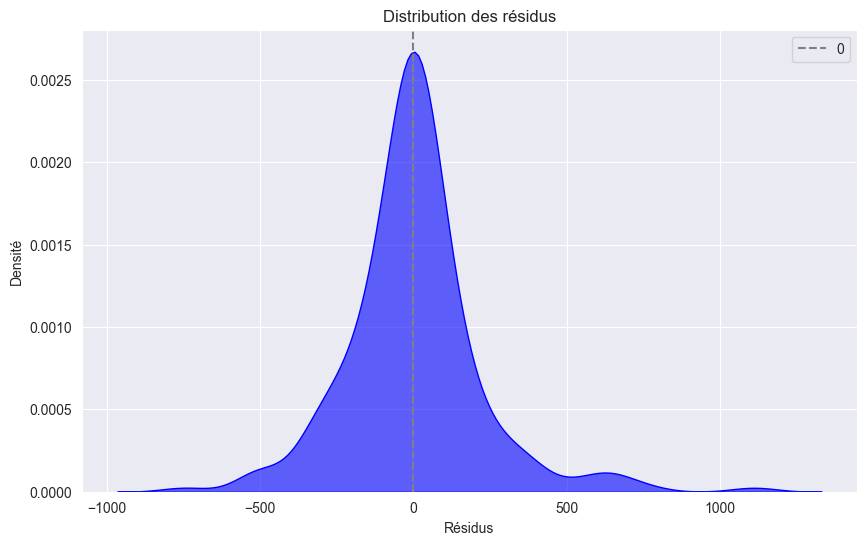

In [112]:
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, color='blue', fill=True, alpha=0.6)
plt.axvline(0, color='grey', linestyle='--', linewidth=1.5, label='0')
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()

# Exercice de prédiction

Imaginons qu'une société de production française veuille produire un film dramatique de 20Me de budget, et décide de le sortir au mois de novembre 2025, quel peut-être le revenu attendu ?

# Outil de modélisation personnalisé

# Conclusion
